# Hello Everyone,

This is the DLP Course Notebook. This will be used for first 4 weeks of the courses in continuation. GA will be added below. It will be fun to learn and connect together.

> By Abhineet Raman



# Learning the HuggingFace Library and using PyTorch library for training and testing Deep Learning Models.


## Installing Modules

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0


# Importing modules dataset to load, understand and play with dataset library of Huggingface

In [ ]:
# prompt: import datasets module from huggingface
from datasets import load_dataset, get_dataset_config_names, get_dataset_split_names, load_from_disk
from pprint import pprint

# Example usage (replace with your desired dataset)
dataset = load_dataset("stanfordnlp/imdb")
dataset

In [ ]:
from datasets import get_dataset_infos

dataset_infos = get_dataset_infos("stanfordnlp/imdb")
pprint(dataset_infos['plain_text'].dataset_size/(1024*1024))

## Selecting the train dataset from the whole Dataset

Specific dataset is required when we wnat task specific fine-tuning of model or training models with standard dataset additionly.

In [ ]:
#method -1
train_dataset = dataset["train"]
train_dataset

#Method-2
train_imbd = load_dataset("stanfordnlp/imdb", split="train")
train_imbd

Checking type of train data

In [ ]:
print(type(train_imbd))

# data inside this type
pprint(train_imbd.features)
print(type(train_imbd.features))

## Deleting the unsupervised part

Delecting specific part of dataset to be more precise towards training or testing.

In [ ]:
_ = dataset.pop('unsupervised')
dataset

In [ ]:
idx = [i for i in range(100)]

selected_data = dataset['train'].select(idx)
selected_data

## Saving data into local system

In [ ]:
dataset.save_to_disk("pyarrow_dataset/imdb_dataset")

## Loading from disk

In [ ]:
loaded_dataset = load_from_disk("pyarrow_dataset/imdb_dataset")
loaded_dataset

# Loading Translation Dataset

In [ ]:
print(get_dataset_config_names("wmt/wmt14"))
print(get_dataset_split_names("wmt/wmt14", "hi-en"))

In [ ]:
trans_data = load_dataset("wmt14", "hi-en")
trans_data

## Comman Methods

In [ ]:
import multiprocessing
print(multiprocessing.cpu_count())

## Filtering

In [ ]:
print("Before Filtering")
print(20*'=')
print(dataset)

In [ ]:
num_words = 100
dataset = dataset.filter(lambda x: len(x['text'].split(' ')) >= num_words)
print("After Filtering")
print(20*'=')
print(dataset)

### Mapping

In [ ]:
def add_prefix(ex):
  ex['text'] = 'IMDB' + ex['text']
  return ex

dataset = dataset.map(add_prefix)
dataset

## Printing the few samples from book Corpus


In [ ]:
print(dataset['train']['text'][1000])

# Week-1 GAs

## Question-1

In [ ]:
#Getting Configration and training sample details of Naamapadam Dataset
print(get_dataset_config_names('ai4bharat/naamapadam'))
print(get_dataset_split_names('ai4bharat/naamapadam', 'hi'))


# importing dataset
hindi_dataset = load_dataset('ai4bharat/naamapadam', 'hi')
hindi_dataset.save_to_disk('pyarrow_dataset/hindi_dataset')
tamil_dataset = load_dataset('ai4bharat/naamapadam', 'ta')
tamil_dataset.save_to_disk('pyarrow_dataset/tamil_dataset')
print(hindi_dataset)
print(tamil_dataset)


# Checking labels and tags
print(hindi_dataset['train'].features)
print(tamil_dataset['train'].features)

## Question-2

In [ ]:
ds = load_dataset('ai4bharat/naamapadam', 'ta')

#locating the cache directory
print(ds.cache_files)

## Question-3 and Question-4

In [ ]:
# Calculating size of the directory

import os

ds = load_from_disk('pyarrow_dataset/tamil_dataset')
print(ds)

# Calculate the total size of the directory
def calculate_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size

# Get the size of the 'pyarrow_dataset/tamil_dataset' directory
dataset_directory = 'pyarrow_dataset/tamil_dataset'
total_size_bytes = calculate_directory_size(dataset_directory)

# Convert size to MB
total_size_mb = total_size_bytes / (1024 * 1024)
print(f"Total size of the directory: {total_size_mb:.2f} MB")

# 2nd method

#ds = load_dataset('ai4bharat/naamapadam', 'ta', download_mode="force_redownload")
dataset_infos = get_dataset_infos("ai4bharat/naamapadam")['ta']
#pprint(dataset_infos)
pprint(f"Tamil dataset size in MB:  {dataset_infos.dataset_size/(1024*1024)}")

dataset_infos = get_dataset_infos("ai4bharat/naamapadam")['hi']
pprint(f"Hindi dataset size in MB: {dataset_infos.dataset_size/(1024*1024)}")

## Question-5

In [ ]:
# Create a new column named “num tokens”. Compute the number of tokens (words) in each sample and store the results in the newly created column. Reassign the modified dataset to the same variable “ds”. How many tokens (in millions) are there in the entire dataset?

ds = load_dataset('ai4bharat/naamapadam', 'ta')
# The map function should return a dictionary with the new column and its value.
ds = ds.map(lambda x: {'num_tokens': len(x['tokens'])})
ds

# Calculate the sum of 'num_tokens' for the 'train' split
total_tokens = sum(x['num_tokens'] for x in ds['train']) + sum(x['num_tokens'] for x in ds['test']) + sum(x['num_tokens'] for x in ds['validation'])

# Convert to millions
total_tokens_millions = total_tokens / 1000000

print(total_tokens)

## Question-7

In [ ]:
# Concatenate all the samples across the splits in the following order: [train:test:validation].
# Currently, each sample contains a list of words (tokens).
# Create a sentence by joining the individual words (tokens) in each sample using a single white space as a delimiter and store the resulting sample in a new column named “text”.
# Create a new dataset by removing the columns “ner tags” and “tokens”.
# Store the new dataset in the same variable “ds”.
# Enter the total number of samples in “ds”

from datasets import concatenate_datasets, interleave_datasets

ds = concatenate_datasets([ds['train'], ds['test'], ds['validation']])
# The map function should return a dictionary with the new column and its value.
ds = ds.map(lambda x: {'text': ' '.join(x['tokens'])})
new_dataset = ds.remove_columns(['ner_tags', 'tokens'])
ds = new_dataset
print("The total number of samples: " , len(ds))

In [ ]:
ds.cache_files

## Question-9

In [ ]:
# Filter the dataset so that all the samples in the dataset should have at least six tokens (any symbol separated by a white space is considered a token).
# Enter the number of samples in the dataset after filtering.
# Enter the exact number. If the answer is 123456, enter it as 123456.

# ds = load_dataset('ai4bharat/naamapadam', 'ta')
ds = ds.filter(lambda x: len(x['text']) >= 6)
print(ds)

## Question-10

In [ ]:
# Download all the splits of Tamil sub-dataset “inltkh.ta” of https://huggingface.co/datasets/ai4bharat/indic_glue .
# Filter the dataset so that each sample contains at least six words (separated by a single white space).
# Then Interleave the resultant dataset with the above filtered dataset of naamapadam.
# Take 80% of samples from naamapadam and 20% from indic glue. Enter the number of samples after interleaving the datasets.
# Note: Set the value of the seed argument to 42.

ds1 = load_dataset('ai4bharat/indic_glue', 'inltkh.ta', split="train+test+validation")
#ds1 = concatenate_datasets([ds1['train'], ds1['test'], ds1['validation']])
print(ds1)
filtered_data = ds1.filter(lambda x: len(x['text']) >= 6)
interleaved_dataset = interleave_datasets([filtered_data, ds], probabilities=[0.2, 0.8], seed=42)
print(interleaved_dataset)

So, You are here after completing *week-1*. I hope you enjoyed learning this. If not, Let's Practice more and understand better.

# Week-2


# Tokenizer building

Welcome to Tokenization World where we build tokens for everything that enters in this world. How to build is a question.  Together, we can learn and understand about the tokens and all the things related to that.

In [ ]:
book_corp = load_dataset('bookcorpus', split="all", trust_remote_code=True)
print(book_corp)

## Enumerating the few Samples

In [ ]:
num_samples = 6
for idx, sample in enumerate(book_corp[0:num_samples]['text']):
  print(f"Sample {idx}: {sample}")

## Building the tokenizer

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.normalizers import Lowercase

Handling Unknown token during **predition**.

In [ ]:
model = BPE(unk_token="[UNK]")
tokenizer = Tokenizer(model)

Adding normalizer and pre_tokenizer into the tokenizer

In [ ]:
tokenizer.normalizers = Lowercase()
tokenizer.pre_tokenizer = Whitespace()

Creating a trainer for the given Vocab size and special tokens

In [ ]:
from tokenizers.trainers import BpeTrainer

# vocab size = 32K, when there is subword(word broken into multiple parts) prefix include ##
trainer = BpeTrainer(vocab_size=32000, special_tokens=["[PAD]","[UNK]"],continuing_subword_prefix='##')

Batch based training to avoid storage error.

In [ ]:
def get_examples(batch_size=1000):
    for i in range(0, len(ds), batch_size):
        yield book_corp[i : i + batch_size]['text']

In [ ]:
#2nd Method
tokenizer.train_from_iterator(get_examples(batch_size=10000),trainer=trainer,length=len(book_corp))

## Saving token for Exploration

In [ ]:
import os

# Create the 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

tokenizer.model.save('model', prefix='hopper')

In [ ]:
with open('model/hopper-merges.txt','r') as file:
    row = 0
    num_lines = 10
    for line in file.readlines():
        print(line)
        row+=1
        if row >= num_lines:
            break

In [ ]:
# Displaying n merges.
with open('model/hopper-merges.txt','r') as file:
    row = 0
    num_lines = 10
    for line in reversed(file.readlines()):
        print(line)
        row+=1
        if row >= num_lines:
            break

# Vocabulary

In [ ]:
# Printing no of merges and vocab sizes.

with open('model/hopper-merges.txt','r') as file:
    lines = file.readlines()

print(f'Number of merges:{len(lines)}')
print(f'vocab size:{tokenizer.get_vocab_size()}')

## Saving vocab to explores what it returns

In [ ]:
vocab = tokenizer.get_vocab()

vocab_sorted = sorted(vocab.items(), key=lambda item: item[1])

# Encoding

In [ ]:
sample = book_corp[0]['text']
print(f'sample: {sample}')
encoding = tokenizer.encode(sample)
print(encoding)

In [ ]:
token_ids = encoding.ids
tokens = encoding.tokens
type_ids = encoding.type_ids
attention_mask = encoding.attention_mask

In [ ]:
from tokenizers.tools import EncodingVisualizer
visualizer = EncodingVisualizer(tokenizer=tokenizer)
visualizer(text=sample)

## Converting encoding into dataframe to look out at anytime

In [ ]:
import pandas as pd

out_dict = {'tokens':tokens,'ids':token_ids,'type_ids':type_ids,'attention_mask':attention_mask}
df = pd.DataFrame.from_dict(out_dict)
df

## Batch encoding

In [ ]:
samples = book_corp[0:4]['text']

batch_encoding = tokenizer.encode_batch(samples)
pprint(batch_encoding)

In [ ]:
# all default args
tokenizer.enable_padding(direction = 'right',
                         pad_id = 0,
                         pad_type_id = 0,
                         pad_token = '[PAD]',
                         length = None, # None default to max_len in the batch
                         pad_to_multiple_of = None)

tokenizer.enable_truncation(max_length=512)

batch_encoding = tokenizer.encode_batch(samples)
pprint(batch_encoding)

#### Quick Test as an example

In [ ]:
text = "All this is so simple to do in HF இ😊."
encoded = tokenizer.encode(text).tokens
print(encoded)

## Saving and loading the tokenizers

In [ ]:
tokenizer.save('hopper.json')

import json
with open('hopper.json','r') as file:
    data = json.load(file)

pprint(data, depth=1)

trained_tokenizer = Tokenizer(BPE())
trained_tokenizer = trained_tokenizer.from_file('hopper.json')
tokens = trained_tokenizer.encode(text).tokens
print(tokens)

## Bert Tokenizer

In [ ]:
bert_tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
bert_tokenizer.normalizer = Lowercase()
bert_tokenizer.pre_tokenizer = Whitespace()
bert_trainer = BpeTrainer(vocab_size=32000, special_tokens=["[PAD]","[UNK]","[CLS]","[SEP]","[MASK]"], continuing_subword_prefix='##')

In [ ]:
from tokenizers.processors import TemplateProcessing

bert_tokenizer.post_processor = TemplateProcessing(single="[CLS] $A [SEP]", pair="[CLS] $A [SEP] $B:1 [SEP]:1", special_tokens=[("[CLS]", 2), ("[SEP]", 3)])

bert_tokenizer.train_from_iterator(get_examples(batch_size=10000), trainer=bert_trainer, length=len(book_corp))

In [ ]:
# Example Text

text = "All these are so simple to do in HF. Let's do more"
encoded = bert_tokenizer.encode(text)
tokens = encoded.tokens
ids = encoded.ids
out_dict = {'tokens':tokens,'ids':ids}
pprint(out_dict,depth=2,compact=True)


In [ ]:
# More Examples

text = "All these are so simple to do in HF. Let's do more"
pair = "We have a long way to go!"
encoded = bert_tokenizer.encode(text,pair)
tokens = encoded.tokens
ids = encoded.ids
out_dict = {'tokens':tokens,'ids':ids}
pprint(out_dict,depth=2,compact=True)

## Decoding

In [ ]:
plane_tokens = bert_tokenizer.decode(ids)
print(plane_tokens)

from tokenizers.decoders import WordPiece

bert_tokenizer.decoder = WordPiece()
plane_tokens = bert_tokenizer.decode(ids)
print(plane_tokens)

## Pre Trained Tokenizer

There are few tokenizer class which are already be trained and can be directly used to encode and decode the tokens.

In [ ]:
encoding = tokenizer.encode(text)
print(encoding)

### PreTrained Tokenizer class

In [ ]:
from transformers import PreTrainedTokenizerFast

pt_tokenizer = PreTrainedTokenizerFast(tokenizer_file='hopper.json', unk_token='[UNK]', pad_token='[PAD]', model_input_names=["input_ids","token_type_ids","attention_mask"],)

model_input = pt_tokenizer(text)
pprint(model_input, compact=True)

model_input = pt_tokenizer(text, text_pair=pair)
pprint(model_input, compact=True)

# GA - 2

Download the BookCorpus dataset. Take every 7-th sample (the indices are multiple of 7:[0,7,14,21,...]) from the entire dataset. This will result in a dataset with 10 million samples (exactly, 10,572,033). Use these samples to build a tokenizer with the BPE tokenization algorithm by varying the vocabulary size.

Normalizer: LowerCase

PreTokenizer: WhiteSpace

Model: BPE

Special tokens: [GO],[UNK],[PAD],[EOS]

PostProcessing: None

Tokenize the input text: “SEBI study finds 93% of individual F&O traders made losses between FY22 and FY24.” using the following configurations.

In [ ]:
!pip install datasets

from datasets import load_dataset, load_from_disk

In [ ]:
book_corpus = load_dataset("bookcorpus", split="all", trust_remote_code=True)
book_corpus.save_to_disk("pyarrow_dataset/book_corpus")

book_corpus = load_from_disk("pyarrow_dataset/book_corpus")
#print(book_corpus)

# Loading and selecting 7th sample
indices = range(0, book_corpus.num_rows, 7)

# Use the select function to create a subset
selected_dataset = book_corpus.select(indices)
print(selected_dataset)

In [ ]:
# Initializing the tokenization alogorithm

from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.normalizers import Lowercase

model = BPE(unk_token="[UNK]")
tokenizer = Tokenizer(model)

# Adding normalizer and pre_tokenizer into the tokenizer
tokenizer.normalizer = Lowercase()
tokenizer.pre_tokenizer = Whitespace()

from tokenizers.trainers import BpeTrainer

# initializing the trainer
tokenizer_trainer = BpeTrainer(vocab_size=5000, special_tokens=["[GO]","[UNK]","[PAD]","[EOS]"], continuing_subword_prefix='##')

def get_examples(batch_size=1000):
    for i in range(0, len(selected_dataset), batch_size):
        yield selected_dataset[i : i + batch_size]['text']

#batch-based Tokenization
tokenizer.train_from_iterator(get_examples(batch_size=1000),trainer=tokenizer_trainer,length=len(selected_dataset))

#Encoding the sample
sample = "SEBI study finds 93% of individual F&O traders made losses between FY22 and FY24."
print(f'sample: {sample}')
encoding = tokenizer.encode(sample)
print(encoding)

from tokenizers.tools import EncodingVisualizer
visualizer = EncodingVisualizer(tokenizer=tokenizer)
visualizer(text=sample)



## Question-1

In [ ]:
# Keep the vocabulary size at 5000 and tokenize the input text using the learned vocabulary.
# Choose the number of tokens returned by the tokenizer.
tokens = encoding.tokens
print(len(tokens))
print(tokens)

## Question-2

Increase the vocabulary size to 10K, 15K and 32K.

For each case, tokenize the same input with the newly learned vocabulary

In [ ]:
# for vocab_size = 10K
model = BPE(unk_token="[UNK]")
tokenizer = Tokenizer(model)

# Adding normalizer and pre_tokenizer into the tokenizer
tokenizer.normalizer = Lowercase()
tokenizer.pre_tokenizer = Whitespace()

from tokenizers.trainers import BpeTrainer

tokenizer_trainer2 = BpeTrainer(vocab_size=10000, special_tokens=["[GO]","[UNK]","[PAD]","[EOS]"], continuing_subword_prefix='##')

def get_examples(batch_size=1000):
    for i in range(0, len(selected_dataset), batch_size):
        yield selected_dataset[i : i + batch_size]['text']

#batch-based Tokenization
tokenizer.train_from_iterator(get_examples(batch_size=1000),trainer=tokenizer_trainer2,length=len(selected_dataset))

#Encoding the sample
sample = "SEBI study finds 93% of individual F&O traders made losses between FY22 and FY24."
print(f'sample: {sample}')
encoding = tokenizer.encode(sample)
print(encoding)

visualizer = EncodingVisualizer(tokenizer=tokenizer)
visualizer(text=sample)

tokens = encoding.tokens
print(len(tokens))
print(tokens)

In [ ]:
# for vocab_size = 15K
model = BPE(unk_token="[UNK]")
tokenizer = Tokenizer(model)

# Adding normalizer and pre_tokenizer into the tokenizer
tokenizer.normalizer = Lowercase()
tokenizer.pre_tokenizer = Whitespace()

from tokenizers.trainers import BpeTrainer
tokenizer_trainer3 = BpeTrainer(vocab_size=15000, special_tokens=["[GO]","[UNK]","[PAD]","[EOS]"], continuing_subword_prefix='##')

def get_examples(batch_size=1000):
    for i in range(0, len(selected_dataset), batch_size):
        yield selected_dataset[i : i + batch_size]['text']

#batch-based Tokenization
tokenizer.train_from_iterator(get_examples(batch_size=1000),trainer=tokenizer_trainer3,length=len(selected_dataset))

#Encoding the sample
sample = "SEBI study finds 93% of individual F&O traders made losses between FY22 and FY24."
print(f'sample: {sample}')
encoding = tokenizer.encode(sample)
print(encoding)

visualizer = EncodingVisualizer(tokenizer=tokenizer)
visualizer(text=sample)

tokens = encoding.tokens
print(len(tokens))
print(tokens)

In [ ]:
# for vocab_size = 32K
model = BPE(unk_token="[UNK]")
tokenizer = Tokenizer(model)

# Adding normalizer and pre_tokenizer into the tokenizer
tokenizer.normalizer = Lowercase()
tokenizer.pre_tokenizer = Whitespace()

from tokenizers.trainers import BpeTrainer
tokenizer_trainer4 = BpeTrainer(vocab_size=32000, special_tokens=["[GO]","[UNK]","[PAD]","[EOS]"], continuing_subword_prefix='##')

def get_examples(batch_size=1000):
    for i in range(0, len(selected_dataset), batch_size):
        yield selected_dataset[i : i + batch_size]['text']

#batch-based Tokenization
tokenizer.train_from_iterator(get_examples(batch_size=1000),trainer=tokenizer_trainer4,length=len(selected_dataset))

#Encoding the sample
sample = "SEBI study finds 93% of individual F&O traders made losses between FY22 and FY24."
print(f'sample: {sample}')
encoding = tokenizer.encode(sample)
print(encoding)

visualizer = EncodingVisualizer(tokenizer=tokenizer)
visualizer(text=sample)

tokens = encoding.tokens
print(len(tokens))
print(tokens)

## Question-3

In [ ]:
# Download the pre-trained tokenizer file “hopper.json” used in the lecture, from here .
# The tokenizer was trained on all 70 million samples in the BookCorpus dataset.
# Tokenize the same input text using this “hopper” tokenizer. How many tokens are there?

hf_tokenizer = Tokenizer.from_file("hopper.json")

# Input text
input_text = "SEBI study finds 93% of individual F&O traders made losses between FY22 and FY24."

# Tokenize the input text
encoding = hf_tokenizer.encode(input_text)

# Print the tokens and their count
print(f"Tokens: {encoding.tokens}")
print(f"Number of tokens: {len(encoding.tokens)}")

## Question-4

In [ ]:
# Suppose we know that the acronym “FY” will likely appear very frequently in most of the input text (assume the text comes from the financial domain).
# Therefore, we hope that adding it manually to the vocabulary might help.
# Add the token “FY” to the vocabulary and tokenize (use the Hopper tokenizer) the input text.
# Enter the number of tokens produced.

# Add the token "FY" to the vocabulary
hf_tokenizer.add_tokens(["FY"])

# Tokenize the input text
encoding = hf_tokenizer.encode(input_text)

# Print the tokens and their count
print(f"Tokens: {encoding.tokens}")
print(f"Number of tokens: {len(encoding.tokens)}")

## Question-5

In [ ]:
# Load the “bert-base-uncased” and "gpt2” tokenizers (use AutoTokenizer function from transformers).
# Which of the following special tokens are used in these tokenizers?

from transformers import AutoTokenizer

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")

print(bert_tokenizer.special_tokens_map)
print(gpt2_tokenizer.special_tokens_map)

## Question-6

In [ ]:
# By now, we have four tokenizers.

# 1. Custom tokenizer (vocab size 32K, trained on 10 million samples)
# 2. bert-base-uncased
# 3. gpt2
# 4. hopper

# Use these four tokenizers to count the number of tokens for the entire “imdb” dataset (drop the “unsupervised” part of the dataset).
# Enter the tokenizers in order such that the size of the dataset (measured in tokens) as returned by the tokenizers is in ascending order. For example, if the first tokenizer yields the smallest number of tokens and the fourth tokenizer yields the largest, you would enter 1234 (without any spaces).”

from datasets import load_dataset, concatenate_datasets
from transformers import AutoTokenizer
from tokenizers import models


# Load IMDb dataset (dropping "unsupervised" part)
imdb_dataset = load_dataset("imdb", split="train+test")

# Helper function to count tokens
def count_tokens(tokenizer, dataset):
    total_tokens = 0
    for text in dataset["text"]:
        tokens = tokenizer.encode(text)
        total_tokens += len(tokens)
    return total_tokens

# 1. Custom Tokenizer (BPE with vocab size 32K)
custom_tokenizer = tokenizer
custom_token_count = count_tokens(tokenizer, imdb_dataset)


# 2. bert-base-uncased
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_token_count = count_tokens(bert_tokenizer, imdb_dataset)

# 3. gpt2
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt2_token_count = count_tokens(gpt2_tokenizer, imdb_dataset)

# 4. Hopper tokenizer (assumed to be loaded from 'hopper.json')
hopper_tokenizer = Tokenizer.from_file("hopper.json")
hopper_token_count = count_tokens(hopper_tokenizer, imdb_dataset)

# Combine results and sort by token count
tokenizer_counts = [
    ("Custom Tokenizer", custom_token_count),
    ("bert-base-uncased", bert_token_count),
    ("gpt2", gpt2_token_count),
    ("Hopper", hopper_token_count),
]
sorted_counts = sorted(tokenizer_counts, key=lambda x: x[1])

# Print the sorted results
print("Token counts in ascending order:")
for i, (name, count) in enumerate(sorted_counts, 1):
    print(f"{i}. {name}: {count} tokens")

# Output the order as per the example
tokenizer_order = "".join(str(i + 1) for i in range(len(sorted_counts)))
print(f"Order of tokenizers: {tokenizer_order}")


In [ ]:
tokenizer.normalizers = Lowercase()
?tokenizer.normalizers


In [ ]:
tokenizer.normalizer = Lowercase()
?tokenizer.normalizer

So Far, It require more practice than we thought i need to be. Structure your above program.

# Week - 3

You have reached this milestone. This week we will learn to train and fine-tune the LLM models. There are multiple ways to do it. We will use **Hugging Face** for these tasks.

Good Luck and Keep learning.

## Importing necessary Modules to understand pretraining of GPT2

In [ ]:
!pip install datasets
!pip install transformers
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset, load_from_disk
from transformers import AutoTokenizer

#for training
from transformers import DataCollatorForLanguageModeling, GPT2Config, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments

#for experiment tracking
import wandb

#common packages
import pandas as pd
from pprint import pprint
import json
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [ ]:
ds_full = load_dataset("bookcorpus", split="all", trust_remote_code=True)

ds_full.save_to_disk("pyarrow_dataset/book_corpus")
ds_full = load_from_disk("pyarrow_dataset/book_corpus")

pprint(ds_full)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

bookcorpus.py:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74004228 [00:00<?, ? examples/s]

Saving the dataset (0/10 shards):   0%|          | 0/74004228 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 74004228
})


### Selecting 1 million random samples

In [ ]:
with ('bc_stats.json', 'r') as f:
  bc_stats = json.load(f)

TypeError: 'tuple' object does not support the context manager protocol

In [ ]:
# plot the data

import random
sorted_len = bc_stats['len_samples_sorted']
bins = np.unique(sorted_len)
plt.figure(figsize=(10,4))
plt.hist(random.sample(sorted_len[0:-50],k=10**6),bins=bins[0:150])
plt.xlabel('Sequence length')
plt.ylabel('count')
plt.grid()
plt.show()

## Tokenization

In [ ]:
hopper_tokenizer = AutoTokenizer.from_pretrained("../week_2/hopper")
print(hopper_tokenizer)

### few samples to test

In [ ]:
bs = 4 # batch_size
model_inputs = hopper_tokenizer(ds_full[0:bs]['text'],padding=True)
pprint(model_inputs['input_ids'],compact=True)

In [ ]:
pprint({id:example for id,example in enumerate(ds_full[ ]['text'])})

### GPT2-Tokenizer initialization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
print(tokenizer)

In [ ]:
tokenizer.pad_token = '<|endoftext|>'

#### Defining mapping function

In [ ]:
# Define a mapping function that takes a batch of samples and returns input_ids and attention_mask such that the length of input_ids is 1024 for all samples

def preprocess_function(examples):
  """
  Takes a batch of text samples and returns input_ids and attention_mask
  with a length of 1024 for all samples.
  """
  tokenizer(
      examples["text"],
      padding="max_length",  # Pad to max_length
      truncation=True,       # Truncate if longer than max_length
      max_length=1024,      # Set max_length to 1024
  )

  return (tokenizer.input_ids,tokenizer.attention_mask)

In [ ]:
tokenized_dataset = ds_full.map(preprocess_function, batched=True)

tokenized_dataset.save_to_disk("data/BC_Chunked")

### Taking smaller dataset for processing

In [ ]:
ds_chunked = load_from_disk("pyarrow_dataset/BC_Chunked")
ds_chunked

## Data Loader

Spliting in train and test set with seed = 42

In [ ]:
ds_split = ds_chunked.train_test_split(test_size=0.007,seed=42)
print(ds_split)

### Loading DataColletor

In [ ]:
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

## Initialize the Model

In [ ]:
configration = GPT2Config()
pprint(configration)

Building the model

In [ ]:
model = GPT2LMHeadModel(configration)
print(model)

No. of parameters

In [ ]:
num_parameters = 0
for param in model.parameters():
    num_parameters += param.numel()
print(f'Number of Parameters:{num_parameters/10**6:.2f}M')

## Train the Model

#### Initializing the wandb

In [ ]:
wandb.init(
    project="DLP-GPT2-Node-1",
    config={
        "batch_size":16,
        "dataset": "Bookcorpus-74M",
    },
)

### Adding the training arguements

In [ ]:
training_args = TrainingArguments( output_dir='out',
                                  eval_strategy="steps",
                                  eval_steps=500,
                                  num_train_epochs=1,
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=8,
                                  bf16=False,
                                  fp16=False,
                                  tf32=False,
                                  adam_beta1=0.9,
                                  adam_beta2=0.999,
                                  learning_rate=2e-5,
                                  weight_decay=0.01,
                                  gradient_accumulation_steps=1,
                                  logging_strategy="steps",
                                  logging_steps = 500,
                                  save_steps=1000,
                                  save_total_limit=15,
                                  report_to='wandb',
                                 )

### Adding Training Pipelines

In [ ]:
trainer = Trainer(model=model,
                 args = training_args,
                 train_dataset=ds_split["train"],
                 eval_dataset= ds_split["test"],
                 data_collator = data_collator)

### Training the model

In [ ]:
results = trainer.train()

## Efficient Training

In [ ]:
rom IPython.display import IFrame
IFrame("https://wandb.ai/a-arun283-iit-madras/DLP-GPT2-Node-1/reports/DLP-PreTraining-GPT-2--Vmlldzo5NTgxMTUx", width="100%", height=600)

## Text Generation

In [ ]:
#after seeing 128(bs)*1024(n_ctxt)*1000(steps)=131 million tokens
model =GPT2LMHeadModel.from_pretrained('out/checkpoint-1000/')

In [ ]:
prompt = "let us have a fun today. What do you say?"
inputs = tokenizer(prompt,return_tensors='pt',padding=True) # return torch tensor
print(inputs)

Generate Method to generate token ids.

In [ ]:
outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=10, top_p=0.95)
print(outputs)

Batch Decoding

In [ ]:
tokenizer.batch_decode(outputs, skip_special_tokens=True)

Checkpoint 4000

In [ ]:
model =GPT2LMHeadModel.from_pretrained('out/checkpoint-4000/')
prompt = "let us have a fun today. What do you say?"
inputs = tokenizer(prompt,return_tensors='pt',padding=True)
outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=10, top_p=0.95)
tokenizer.batch_decode(outputs, skip_special_tokens=True)

Checkpoint 8000

In [ ]:
model =GPT2LMHeadModel.from_pretrained('out/checkpoint-8185/')
prompt = "let us have a fun today. What do you say?"
inputs = tokenizer(prompt,return_tensors='pt',padding=True)
outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, top_k=10, top_p=0.95)
tokenizer.batch_decode(outputs, skip_special_tokens=True)

So, You have learnt about the pretraining of GPT-2.

Let's hands-on with some problems of the GA

# GA-3

In [1]:
!pip install datasets
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syst

In [2]:
from datasets import load_dataset, load_from_disk, Dataset
from transformers import AutoTokenizer

from transformers import DataCollatorForLanguageModeling, GPT2Config, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments
import wandb

#common packages
import pandas as pd
from pprint import pprint
import json
import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint

## Question-1

In [3]:
# Download the Yelp review dataset “Yelp/yelp_review_full”. Split each sample by calling the string method “.split()” and choose the correct statements about the dataset.
#  A. The dataset contains close to 99 million words
#  B. There are more than 300 samples that contain a single word
#  C. There are less than 300 samples that contain only a single word
#  D. “Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for.” is one of the single words in the dataset
#  E. The average length of a sample is 134.1
#  F. The distribution of the length of the samples is right skewed

# yelp_ds = load_dataset("Yelp/yelp_review_full", split='all', trust_remote_code=True)
# yelp_ds.save_to_disk("pyarrow_dataset/yelp_review_full")
# yelp_ds = load_from_disk("pyarrow_dataset/yelp_review_full")
# print(yelp_ds)

try:
    # Load the dataset
    yelp_ds = load_dataset("Yelp/yelp_review_full", split="train+test", trust_remote_code=True)

    # Save the dataset to disk for future use
    save_path = "pyarrow_dataset/yelp_review_full"
    os.makedirs(save_path, exist_ok=True)
    yelp_ds.save_to_disk(save_path)
    print("Dataset downloaded and saved successfully.")
except Exception as e:
    print(f"Error while downloading dataset: {e}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/700000 [00:00<?, ? examples/s]

Dataset downloaded and saved successfully.


In [4]:
#loading from the disk

yelp_ds = load_from_disk("pyarrow_dataset/yelp_review_full")
print(yelp_ds)

Dataset({
    features: ['label', 'text'],
    num_rows: 700000
})


In [5]:
# filter data that contain a single word
num_words=0
num_single_words= 0 # to check number of single word sentences
num_words_list = [] # for checking the distribution
has_word = "NO"
for sample in yelp_ds:
    if sample["text"] == "Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for." :
        has_word = "YES"
    num_word = len(sample['text'].split(' '))
    num_words_list.append(num_word)
    num_words+=num_word
    if num_word == 1:
        num_single_words+=1

print(f"Dataset contains '{has_word}',")
print(f"Total number of words: {num_words/1000000} million ")
print(f"Length of the word list (number of samples): {len(num_words_list)}")
print(f"Total number of sentences with a single word: {num_single_words}")
print(f"Average number of words per sentence is {num_words/len(yelp_ds)}")

Dataset contains 'NO',
Total number of words: 95.72955 million 
Length of the word list (number of samples): 700000
Total number of sentences with a single word: 355
Average number of words per sentence is 136.7565


[]

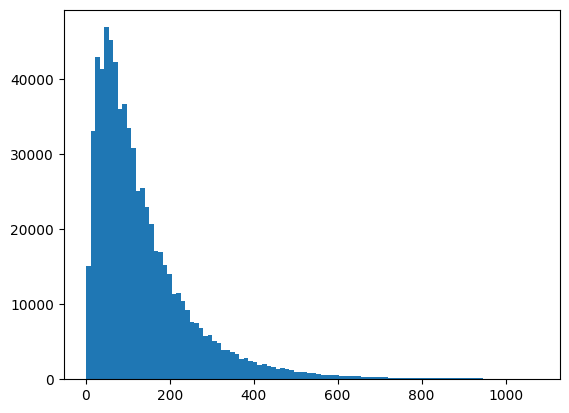

In [6]:
## skewness plot

plt.hist(num_words_list, bins=100)
plt.plot()

## Question-2


Load the “bert-base-uncased” pre-trained tokenizer and choose the correct statements about the tokenizer.

 A. The tokenizer is used for the BERT model with the context length of 512

 B. The tokenizer has 5 special tokens

 C. Tokenizing a sample that contains more than 512 words would result in truncation of all tokens beyond the length 512

 D. Tokenizer inserts all the special tokens when it processes a single sample as an input

 E. Tokenizer inserts [CLS] and [SEP] special tokens when it processes a single sample as an input

 F. Tokenizer inserts only [CLS]special token when it processes a single sample as an input

In [7]:
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print(bert_tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


In [8]:
sample = "There is a use-case of the BERT Tokenizer"
tokens = bert_tokenizer(sample)
pprint(tokens)

#check for length greater than 512

sample = "Words can be multiplied." * 150
tokens = bert_tokenizer(sample)
print(tokens.input_ids)

filtered_ids = [x for x in tokens.input_ids if x == 103]
print(filtered_ids)

Token indices sequence length is longer than the specified maximum sequence length for this model (752 > 512). Running this sequence through the model will result in indexing errors


{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'input_ids': [101,
               2045,
               2003,
               1037,
               2224,
               1011,
               2553,
               1997,
               1996,
               14324,
               19204,
               17629,
               102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
[101, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064, 2022, 28608, 1012, 2616, 2064

## Question 3

Use “BertConfig” and “BertForMaskedLM” to construct the default (original) BERT model. Choose the correct statements

 A. The model has 12 Bert layers

 B. The model has 6 Bert layers

 C. The model uses absolute position embeddings

 D. The word embedding (token embedding) layer has about 23 million learnable parameters

 E. The total number of parameters in the model is close to 110 million

In [9]:
from transformers import BertConfig, BertForMaskedLM

configration = BertConfig()
print(configration)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [10]:
bert_model = BertForMaskedLM(configration)
print(bert_model)

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [11]:
# No. of learnable parameters in Word_embedding layer

num_parameters = 0

for params in bert_model.bert.embeddings.word_embeddings.parameters():
  num_parameters += params.numel()

print(f"Total number of parameters: {num_parameters/10**6}M")

Total number of parameters: 23.440896M


In [12]:
#total no. of parameters

num_parameters = 0

for params in bert_model.parameters():
  num_parameters += params.numel()

print(f"Total number of parameters: {num_parameters/10**6}M")

Total number of parameters: 109.514298M


## Question-4

In [13]:
# Double the context length from 512 to 1024 (you can change it in the configuration).
# Count the number of parameters and enter the change in the number of parameters (in millions) compared to the default configuration.


new_config = BertConfig(max_position_embeddings=1024)
print(new_config)

model = BertForMaskedLM(new_config)
new_num_parameters = 0

for params in model.parameters():
  new_num_parameters += params.numel()

changed_parameters = new_num_parameters - num_parameters

print(f"Total number of parameters changed: {changed_parameters}")

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 1024,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Total number of parameters changed: 393216


## Question-5

Pack (chunk) the samples such that the length of all the samples in the dataset is 512 (for efficient training). Define a mapping function that implements the following procedure
 1. Take a batch of 1000 samples
 2. Tokenize it to get input IDs and attention mask
 3. Concatenate all the input IDs
 4. Chunk the concatenated IDs into a size of 512
 5. Drop the last chunk if its length is less than 512
 6. Pack all the chunks
 7. Iterate over all the batches in the dataset

Store the resulting dataset in the variable “ds_chunked”. Enter the total number of samples in the new dataset.

Note: the batch size should be kept at 1000 while calling "ds.map()" for theanswer to match.

In [14]:
import itertools

CHUNK_SIZE = 512

# Define the mapping function for chunking
def tokenized_samples(batch):
    # Step 1: Tokenize the batch of 1000 samples
    tokenized = bert_tokenizer(
        batch['text'],
        truncation=True,
        padding=False,
    )

    return {
        "input_ids": tokenized["input_ids"],
        "attention_mask": tokenized["attention_mask"],
    }

def chunk_samples(batch):
    # Concatenate all input_ids and attention_mask from the batch
    all_input_ids = list(itertools.chain.from_iterable(batch["input_ids"]))
    all_attention_mask = list(itertools.chain.from_iterable(batch["attention_mask"]))

    # Chunk the concatenated lists into segments of size 512, dropping the last if incomplete
    chunked_input_ids = [all_input_ids[i : i + CHUNK_SIZE] for i in range(0, len(all_input_ids), CHUNK_SIZE) if len(all_input_ids[i : i + CHUNK_SIZE]) == CHUNK_SIZE]
    chunked_attention_mask = [all_attention_mask[i : i + CHUNK_SIZE] for i in range(0, len(all_attention_mask), CHUNK_SIZE) if len(all_attention_mask[i : i + CHUNK_SIZE]) == CHUNK_SIZE]

    # Create a new Dataset with the chunked data
    return {"input_ids": chunked_input_ids, "attention_mask": chunked_attention_mask}

# Apply the tokenization function
tokenized_dataset = yelp_ds.map(tokenized_samples, batched=True, batch_size=1000, remove_columns=['text', 'label'], num_proc=4)  # Remove original columns

# Apply the chunking function to the tokenized dataset
ds_chunked = tokenized_dataset.map(chunk_samples, batched=True, batch_size=1000, num_proc=4)

# Calculate the total number of samples after chunking
total_samples = len(ds_chunked["input_ids"])  # Get the length of the "input_ids" list

print(f"Total number of samples in the chunked dataset: {total_samples}")

Map (num_proc=4):   0%|          | 0/700000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/700000 [00:00<?, ? examples/s]

Total number of samples in the chunked dataset: 234613


In [15]:
# Convert the tokenized_ds (which is a dictionary) into a Dataset
ds_chunked

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 234613
})

In [16]:
import torch

# Convert dataset to PyTorch tensors
ds_chunked.set_format(type="torch", columns=["input_ids", "attention_mask"])

## Question-6

Split the new dataset into training and test sets with the test_size=0.05 and seed=42. Use the appropriate data collator function for the MLM objective and set the masking probability to 0.2. Use the data loader from PyTorch to load a batch of samples, and enter the token ID corresponding to the unmasked token


In [17]:
#splitting the dataset
ds_split = ds_chunked.train_test_split(test_size=0.05,seed=42)

train_dataset = ds_split["train"]
test_dataset = ds_split["test"]

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 222882
Test dataset size: 11731


In [18]:
from transformers import DataCollatorForWholeWordMask

#configuring the model
data_collator = DataCollatorForWholeWordMask(
    tokenizer=bert_tokenizer,
    mlm_probability=0.2  # 20% of tokens will be masked
)

In [19]:
#pytorch to load data
import torch
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=ds_split['train'],
                        collate_fn=data_collator,
                        batch_size=4,
                        )

eval_dataloader = DataLoader(dataset=ds_split['test'],
                        collate_fn=data_collator,
                        batch_size=4,
                        )

In [20]:
#printing token_id for masked token
batch = next(iter(train_dataloader))

# Extract token IDs corresponding to unmasked tokens
input_ids = batch["input_ids"]
labels = batch["labels"]

# Masked tokens are -100 in `labels`. Unmasked tokens retain their original IDs.
unmasked_token_ids = [
    [input_ids[i][j].item() for j in range(len(labels[i])) if labels[i][j] != -100]
    for i in range(len(labels))
]

# Print a batch of unmasked token IDs
print("\nSample of Unmasked Token IDs:")
for i, token_ids in enumerate(unmasked_token_ids[:2]):  # Show first 2 examples
    print(f"Example {i+1}: {token_ids}")


Sample of Unmasked Token IDs:
Example 1: [103, 103, 103, 103, 29959, 21314, 103, 103, 103, 103, 103, 103, 25517, 103, 103, 103, 103, 103, 103, 103, 103, 103, 24967, 103, 103, 103, 103, 103, 103, 103, 2421, 103, 103, 103, 103, 24281, 103, 103, 14887, 103, 103, 103, 103, 103, 2017, 14361, 103, 103, 103, 103, 2017, 103, 103, 28106, 103, 2005, 103, 1996, 103, 103, 26247, 103, 103, 103, 103, 103, 1997, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 1012, 103, 103, 103, 103, 5845, 103, 103, 103, 103, 103, 103, 1999, 103, 103, 29287, 103, 103, 103, 103, 14389, 103, 103, 25037, 103]
Example 2: [103, 2821, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 1005, 6025, 103, 7727, 103, 103, 19993, 103, 103, 103, 103, 4967, 103, 103, 103, 103, 103, 103, 103, 103, 8810, 103, 1050, 103, 103, 103, 103, 103, 103, 103, 1475, 103, 3071, 103, 3319, 103, 103, 103, 13852, 103, 103, 103, 103, 25305, 103, 1055, 7292, 103, 103, 103, 103, 103, 103, 2396, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103

## Question-7

Create a small BERT model by changing the following hyper-parameters and keeping the other hyper-parameters as is

 • num_hidden_layers = 6

 • hidden size: 384

 • intermediate_size: 1536

 and start training the model with a batch of size 8 for an epoch. What is the loss value at the end of the training?

**Note: You may optionally save the checkpoints for every N-th step.**

In [21]:
new_config = BertConfig(
    num_hidden_layers=6,
    hidden_size=384,
    intermediate_size=1536,
)

model = BertForMaskedLM(new_config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 384, padding_idx=0)
      (position_embeddings): Embedding(512, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise

In [22]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=bert_tokenizer,
    mlm=True,
    mlm_probability=0.15,
)

In [23]:
# Train with new config with batch size of 8 for an epoch
# Calculate loss

training_args = TrainingArguments(
    output_dir='out',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    bf16=False,
    fp16=False,
    tf32=False,
    adam_beta1=0.9,
    adam_beta2=0.999,
    learning_rate=2e-5,
    weight_decay=0.01,
    gradient_accumulation_steps=1,
    logging_strategy="steps",
    logging_steps = 500,
    save_steps=1000,
    save_total_limit=15,
    evaluation_strategy="epoch",
    report_to = "none"
    )


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [24]:
trainer = Trainer(model=model,
                 args = training_args,
                 train_dataset=ds_split["train"],
                 eval_dataset= ds_split["test"],
                 data_collator = data_collator)


In [ ]:
result = trainer.train()

print(result)

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


## Question-8

In [ ]:
model =BertForMaskedLM.from_pretrained('bert/checkpoint-14000/')

text = "This is really a [MASK] experience for all of [MASK]"

inputs = tokenizer(text, return_tensors="pt")

token_logits = model(**inputs).logits

# Find the location of [MASK] and extract its logits

mask_token_index =   torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

mask_token_logits = token_logits[0, mask_token_index, :]

# Pick the [MASK] candidates with the highest logits

top_5_tokens =   torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(f"'>>> {text.replace(tokenizer.mask_token,   	  tokenizer.decode([token]))